<a href="https://colab.research.google.com/github/Omar-Torres11/Branch-PL/blob/main/chrom_abb_gen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Main libraries to for image manipulation

import numpy as np
import random
import pandas as pd
from PIL import Image
from PIL import ImageFilter
import matplotlib.pyplot as plt
import seaborn as sns  # For better visualization

###Tunning Variables###

threshold = 125  # Adjust the threshold value as needed
max_shift = 12   #Random RGB shifts
blur_radius = 1.5  # Adjust for stronger/weaker blur

#######################

# Load the image and convert to grayscale
#image = Image.open('/content/test_images/capitol.jpg')
image = Image.open('capitol.jpg')

#im_gray = np.array(Image.open('/content/test_images/capitol.jpg').convert('L'))
im_gray = np.array(Image.open('capitol.jpg').convert('L'))


# Create x and y arrays based on image dimensions
x = np.linspace(0, im_gray.shape[1] - 1, im_gray.shape[1])
y = np.linspace(0, im_gray.shape[0] - 1, im_gray.shape[0])

# Ensure x and y are 2D grids that match the shape of the image
x, y = np.meshgrid(x, y)

np.pad(im_gray, ((1,2),(2,1)), 'constant')

def numLaplacian(f, x, y):
    gradX = np.gradient(f, axis=1)
    gradY = np.gradient(f, axis=0)
    derX = np.gradient(gradX, axis=1)
    derY = np.gradient(gradY, axis=0)
    approxSecVals = derX + derY
    return approxSecVals

edge_img = numLaplacian(im_gray, x, y)

# Scale the edge image to [0, 255]
edge_img_scaled = ((edge_img - edge_img.min()) / (edge_img.max() - edge_img.min()) * 255).astype(np.uint8)

# Threshold to make edges more pronounced

pronounced_edges_img = np.where(edge_img_scaled > threshold, 255, 0).astype(np.uint8)

# Invert the image (make edges white, background black)
inverted_edges_img = 255 - pronounced_edges_img

# Create a grayscale image from the inverted edges image
inverted_edges_pil_img = Image.fromarray(inverted_edges_img, mode='L')

# Save the inverted grayscale edges image
inverted_edges_pil_img.save("capitol_edge.jpg")

height, width = inverted_edges_img.shape
pixel_coords =[]

for y in range(height):
  for x in range(width):
    if (inverted_edges_img[y][x] == 0):
      pixel_coords.append((x,y))


#print(pixel_coords)

##Splitting the original image into it's rgb channels
image = image.convert("RGB")
image_array = np.array(image)
red_array = image_array[:,:,0].copy()
green_array = image_array[:,:,1].copy()
blue_array = image_array[:,:,2].copy()


red_shifted = red_array.copy()
green_shifted = green_array.copy()
blue_shifted = blue_array.copy()
for x, y in pixel_coords:
    # Each channel gets its own shift values
    dx_r, dy_r = random.randint(-max_shift, max_shift), random.randint(-max_shift, max_shift)
    dx_g, dy_g = random.randint(-max_shift, max_shift), random.randint(-max_shift, max_shift)
    dx_b, dy_b = random.randint(-max_shift, max_shift), random.randint(-max_shift, max_shift)

    # Ensure new positions are within bounds
    new_x_r, new_y_r = np.clip(x + dx_r, 0, width - 1), np.clip(y + dy_r, 0, height - 1)
    new_x_g, new_y_g = np.clip(x + dx_g, 0, width - 1), np.clip(y + dy_g, 0, height - 1)
    new_x_b, new_y_b = np.clip(x + dx_b, 0, width - 1), np.clip(y + dy_b, 0, height - 1)

    # Apply shifts independently
    red_shifted[y, x] = red_array[new_y_r, new_x_r]
    #green_shifted[y, x] = green_array[new_y_g, new_x_g]
    green_shifted[y,x] = green_array[y,x]
    blue_shifted[y, x] = blue_array[new_y_b, new_x_b]

# Merge channels back
chromatic_aberration_img = np.stack([red_shifted, green_shifted, blue_shifted], axis=2)

# Convert to PIL image and save/show
final_image = Image.fromarray(chromatic_aberration_img.astype(np.uint8))
final_image.save("chromatic_aberration_randomized.png")
final_image.show()


# Merge channels back into an image
shifted_image = np.stack([red_shifted, green_shifted, blue_shifted], axis=2)
shifted_image_pil = Image.fromarray(shifted_image.astype(np.uint8))

shifted_image_pil = Image.fromarray(shifted_image.astype(np.uint8))

# Apply Gaussian blur to each channel separately **only near edges**
blur_mask = np.zeros((height, width), dtype=np.uint8)

# Set pixels near edges to 255 (white in mask)
for x, y in pixel_coords:
    blur_mask[y, x] = 255

# Convert mask to a grayscale PIL image
blur_mask_img = Image.fromarray(blur_mask).convert("L")

# Apply Gaussian blur to the shifted image
blurred_image = shifted_image_pil.filter(ImageFilter.GaussianBlur(blur_radius))

# Use the mask to combine sharp and blurred images
final_image = Image.composite(blurred_image, shifted_image_pil, blur_mask_img)

# Save and show the final image
final_image.save("chromatic_aberration_blurred_edges.png")
final_image.show()



def longitudinal_aberration(Image, max_shift):

  return Image


###Esto fue pa depurrar algo
# plt.figure(figsize=(10, 8))  # Set figure size
# sns.heatmap(inverted_edges_img, cmap="coolwarm", annot=False, cbar=True)

# # Add title and labels
# plt.title("Heatmap of Inverted Edges Image")
# plt.xlabel("X-axis (Width)")
# plt.ylabel("Y-axis (Height)")

# # Show the heatmap
# plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'capitol.jpg'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


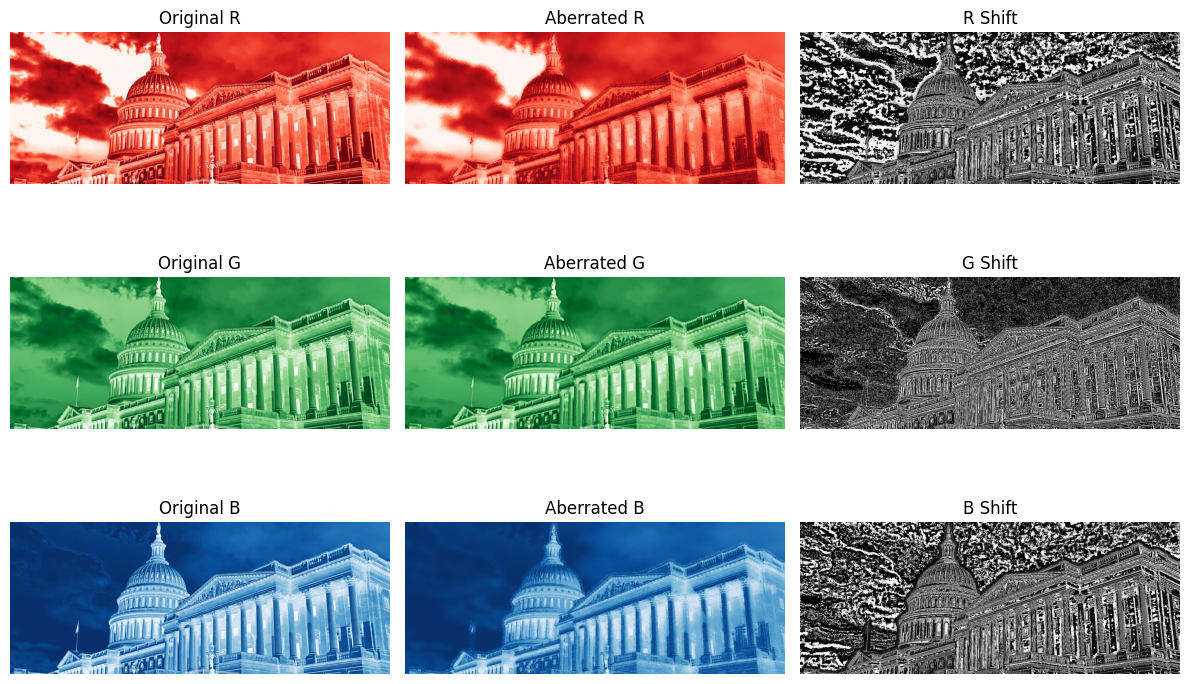

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original and aberrated images
#original = cv2.imread("/content/test_images/capitol.jpg")
original = cv2.imread("capitol.jpg")

#aberrated = cv2.imread("/content/chromatic_aberration_blurred_edges.png")
aberrated = cv2.imread("chromatic_aberration_blurred_edges.png")

# Convert from BGR (OpenCV default) to RGB
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
aberrated = cv2.cvtColor(aberrated, cv2.COLOR_BGR2RGB)

# Split into R, G, B channels
orig_r, orig_g, orig_b = cv2.split(original)
aberr_r, aberr_g, aberr_b = cv2.split(aberrated)

# Plot comparison
fig, axes = plt.subplots(3, 3, figsize=(12, 8))

# Titles
titles = ["Original", "Aberrated", "Difference"]

# Red Channel
axes[0, 0].imshow(orig_r, cmap="Reds")
axes[0, 0].set_title("Original R")
axes[0, 1].imshow(aberr_r, cmap="Reds")
axes[0, 1].set_title("Aberrated R")
axes[0, 2].imshow(abs(orig_r - aberr_r), cmap="gray")
axes[0, 2].set_title("R Shift")

# Green Channel
axes[1, 0].imshow(orig_g, cmap="Greens")
axes[1, 0].set_title("Original G")
axes[1, 1].imshow(aberr_g, cmap="Greens")
axes[1, 1].set_title("Aberrated G")
axes[1, 2].imshow(abs(orig_g - aberr_g), cmap="gray")
axes[1, 2].set_title("G Shift")

# Blue Channel
axes[2, 0].imshow(orig_b, cmap="Blues")
axes[2, 0].set_title("Original B")
axes[2, 1].imshow(aberr_b, cmap="Blues")
axes[2, 1].set_title("Aberrated B")
axes[2, 2].imshow(abs(orig_b - aberr_b), cmap="gray")
axes[2, 2].set_title("B Shift")

# Remove axes
for ax in axes.flatten():
    ax.axis("off")

plt.tight_layout()
plt.show()


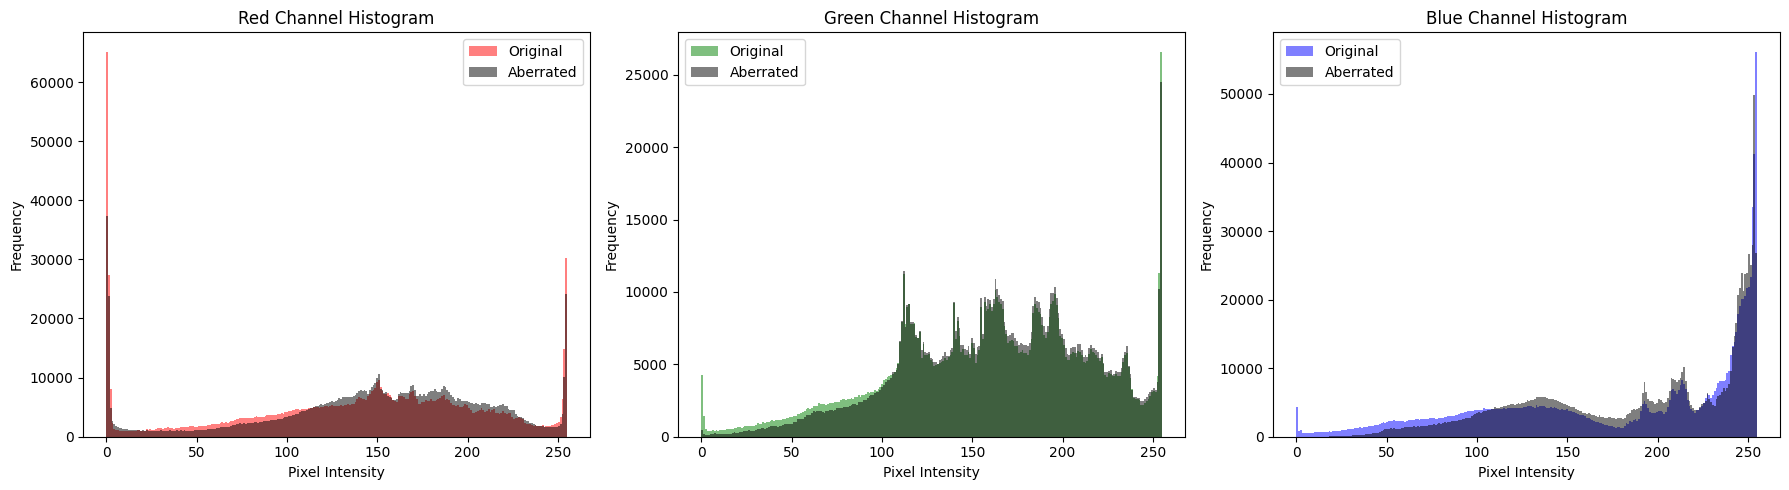

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load original and aberrated images
#original = cv2.imread("/content/test_images/capitol.jpg")
original = cv2.imread("capitol.jpg")

#aberrated = cv2.imread("/content/chromatic_aberration_blurred_edges.png")
aberrated = cv2.imread("chromatic_aberration_blurred_edges.png")

# Convert from BGR (OpenCV default) to RGB
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
aberrated = cv2.cvtColor(aberrated, cv2.COLOR_BGR2RGB)

# Split channels
channels = ['Red', 'Green', 'Blue']
orig_channels = cv2.split(original)
aberr_channels = cv2.split(aberrated)

# Plot histograms
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, (orig, aberr, color) in enumerate(zip(orig_channels, aberr_channels, ['red', 'green', 'blue'])):
    axes[i].hist(orig.ravel(), bins=256, alpha=0.5, color=color, label='Original')
    axes[i].hist(aberr.ravel(), bins=256, alpha=0.5, color="black", linestyle='dashed', label='Aberrated')
    axes[i].set_title(f"{channels[i]} Channel Histogram")
    axes[i].set_xlabel("Pixel Intensity")
    axes[i].set_ylabel("Frequency")
    axes[i].legend()

plt.tight_layout()
plt.show()


In [ ]:
def shift_channel(channel, max_shift):
    """Shifts a channel by a random amount within the max_shift range."""
    dx = random.randint(-max_shift, max_shift)
    dy = random.randint(-max_shift, max_shift)

    shifted_channel = np.roll(channel, shift=dy, axis=0)  # Shift vertically
    shifted_channel = np.roll(shifted_channel, shift=dx, axis=1)  # Shift horizontally

    return shifted_channel

# Set maximum shift for entire channel
channel_shift = 10  # Adjust as needed

# Shift the red and blue channels
red_shifted_global = shift_channel(red_array, channel_shift)
blue_shifted_global = shift_channel(blue_array, channel_shift)

# Keep the green channel unchanged
green_channel = image_array[:, :, 1]

# Merge shifted channels back
global_shifted_image = np.stack([red_shifted_global, green_channel, blue_shifted_global], axis=2)

# Convert to PIL image and save
global_shifted_pil = Image.fromarray(global_shifted_image.astype(np.uint8))
global_shifted_pil.save("chromatic_aberration_global_shift.png")
global_shifted_pil.show()


Implementacion en CUDA (GPU Parallelization)

In [ ]:
# Full CUDA implementation for image manipulation including edge detection and channel shifting
import cupy as cp
import numpy as np
import random
from PIL import Image, ImageFilter

def shift_channel_cuda(channel, max_shift):
    """Shifts a channel by a random amount using CUDA for parallel execution."""
    dx = random.randint(-max_shift, max_shift)
    dy = random.randint(-max_shift, max_shift)

    channel_gpu = cp.asarray(channel)

    # Shift using roll in parallel
    shifted_channel_gpu = cp.roll(channel_gpu, shift=dy, axis=0)
    shifted_channel_gpu = cp.roll(shifted_channel_gpu, shift=dx, axis=1)

    return cp.asnumpy(shifted_channel_gpu)

def compute_laplacian_cuda(image):
    """Computes the Laplacian of an image using CUDA for edge detection."""
    image_gpu = cp.asarray(image, dtype=cp.float32)

    grad_x = cp.gradient(image_gpu, axis=1)
    grad_y = cp.gradient(image_gpu, axis=0)

    laplacian = cp.gradient(grad_x, axis=1) + cp.gradient(grad_y, axis=0)

    return cp.asnumpy(laplacian)

# Tuning Variables
threshold = 125  # Adjust the threshold value as needed
max_shift = 12   # Random RGB shifts
blur_radius = 1.1  # Adjust for stronger/weaker blur

# Load the image and convert to grayscale
image = Image.open('capitol.jpg').convert("RGB")
image_array = np.array(image)

# Convert image to grayscale for edge detection
im_gray = np.array(image.convert('L'))

# Compute edges using CUDA
edge_img = compute_laplacian_cuda(im_gray)

# Scale and threshold the edge image
edge_img_scaled = ((edge_img - edge_img.min()) / (edge_img.max() - edge_img.min()) * 255).astype(np.uint8)
pronounced_edges_img = np.where(edge_img_scaled > threshold, 255, 0).astype(np.uint8)

# Invert the edges
inverted_edges_img = 255 - pronounced_edges_img

# Save edge-detected image
Image.fromarray(inverted_edges_img, mode='L').save("capitol_edge_cuda.jpg")

# Identify edge coordinates
height, width = inverted_edges_img.shape
pixel_coords = [(x, y) for y in range(height) for x in range(width) if inverted_edges_img[y, x] == 0]

# Split channels
red_array = image_array[:, :, 0]
green_array = image_array[:, :, 1]
blue_array = image_array[:, :, 2]

# Shift red and blue channels using CUDAblob
red_shifted = shift_channel_cuda(red_array, max_shift)
blue_shifted = shift_channel_cuda(blue_array, max_shift)

# Keep the green channel unchanged
shifted_image = np.stack([red_shifted, green_array, blue_shifted], axis=2)

# Apply Gaussian blur to edges
blur_mask = np.zeros((height, width), dtype=np.uint8)
for x, y in pixel_coords:
    blur_mask[y, x] = 255

blur_mask_img = Image.fromarray(blur_mask).convert("L")
shifted_image_pil = Image.fromarray(shifted_image.astype(np.uint8))

blurred_image = shifted_image_pil.filter(ImageFilter.GaussianBlur(blur_radius))
final_image = Image.composite(blurred_image, shifted_image_pil, blur_mask_img)

# Save and display the final image
final_image.save("chromatic_aberration_blurred_edges_cuda.png")
final_image.show()


Bash script for downloading Landscape dataset in runtime

In [ ]:
%%bash
curl -L -o /content/landscape-pictures.zip \
  "https://www.kaggle.com/api/v1/datasets/download/arnaud58/landscape-pictures"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  620M  100  620M    0     0  20.0M      0  0:00:30  0:00:30 --:--:-- 22.2M


In [ ]:
%%bash
unzip /content/landscape-pictures.zip -d /content/landscape-pictures

Archive:  /content/landscape-pictures.zip
  inflating: /content/landscape-pictures/00000000.jpg  
  inflating: /content/landscape-pictures/00000000_(2).jpg  
  inflating: /content/landscape-pictures/00000000_(3).jpg  
  inflating: /content/landscape-pictures/00000000_(4).jpg  
  inflating: /content/landscape-pictures/00000000_(5).jpg  
  inflating: /content/landscape-pictures/00000000_(6).jpg  
  inflating: /content/landscape-pictures/00000000_(7).jpg  
  inflating: /content/landscape-pictures/00000001.jpg  
  inflating: /content/landscape-pictures/00000001_(2).jpg  
  inflating: /content/landscape-pictures/00000001_(3).jpg  
  inflating: /content/landscape-pictures/00000001_(4).jpg  
  inflating: /content/landscape-pictures/00000001_(5).jpg  
  inflating: /content/landscape-pictures/00000001_(6).jpg  
  inflating: /content/landscape-pictures/00000001_(7).jpg  
  inflating: /content/landscape-pictures/00000002.jpg  
  inflating: /content/landscape-pictures/00000002_(2).jpg  
  inflatin

Cuda Image Batch Proccesing (still too slow)



In [ ]:
import cupy as cp
import numpy as np
import random
import os
from PIL import Image, ImageFilter

def shift_channel_cuda(channel, max_shift):
    dx = random.randint(-max_shift, max_shift)
    dy = random.randint(-max_shift, max_shift)
    channel_gpu = cp.asarray(channel)
    shifted_channel_gpu = cp.roll(channel_gpu, shift=dy, axis=0)
    shifted_channel_gpu = cp.roll(shifted_channel_gpu, shift=dx, axis=1)
    return cp.asnumpy(shifted_channel_gpu)

def compute_laplacian_cuda(image):
    image_gpu = cp.asarray(image, dtype=cp.float32)
    grad_x = cp.gradient(image_gpu, axis=1)
    grad_y = cp.gradient(image_gpu, axis=0)
    laplacian = cp.gradient(grad_x, axis=1) + cp.gradient(grad_y, axis=0)
    return cp.asnumpy(laplacian)

def process_image(image_path, output_folder, max_shift=8, threshold=125, blur_radius=1.5):
    image = Image.open(image_path).convert("RGB")
    image_array = np.array(image)
    im_gray = np.array(image.convert('L'))
    edge_img = compute_laplacian_cuda(im_gray)
    edge_img_scaled = ((edge_img - edge_img.min()) / (edge_img.max() - edge_img.min()) * 255).astype(np.uint8)
    pronounced_edges_img = np.where(edge_img_scaled > threshold, 255, 0).astype(np.uint8)
    inverted_edges_img = 255 - pronounced_edges_img
    height, width = inverted_edges_img.shape
    pixel_coords = [(x, y) for y in range(height) for x in range(width) if inverted_edges_img[y, x] == 0]

    red_array = image_array[:, :, 0]
    green_array = image_array[:, :, 1]
    blue_array = image_array[:, :, 2]
    red_shifted = shift_channel_cuda(red_array, max_shift)
    blue_shifted = shift_channel_cuda(blue_array, max_shift)
    shifted_image = np.stack([red_shifted, green_array, blue_shifted], axis=2)

    blur_mask = np.zeros((height, width), dtype=np.uint8)
    for x, y in pixel_coords:
        blur_mask[y, x] = 255

    blur_mask_img = Image.fromarray(blur_mask).convert("L")
    shifted_image_pil = Image.fromarray(shifted_image.astype(np.uint8))
    blurred_image = shifted_image_pil.filter(ImageFilter.GaussianBlur(blur_radius))
    final_image = Image.composite(blurred_image, shifted_image_pil, blur_mask_img)

    os.makedirs(output_folder, exist_ok=True)
    output_path = os.path.join(output_folder, os.path.basename(image_path))
    final_image.save(output_path)
    print(f"Processed and saved: {output_path}")

def process_folder(input_folder, output_folder):
    image_extensions = {'.jpg', '.jpeg', '.png'}
    for filename in os.listdir(input_folder):
        if any(filename.lower().endswith(ext) for ext in image_extensions):
            image_path = os.path.join(input_folder, filename)
            process_image(image_path, output_folder)

if __name__ == "__main__":
    input_folder = "landscape-pictures"
    output_folder = "images_output"
    process_folder(input_folder, output_folder)


Processed and saved: images_output/00000087_(2).jpg
Processed and saved: images_output/00000734_(2).jpg
Processed and saved: images_output/00000339_(3).jpg
Processed and saved: images_output/00000427_(4).jpg
Processed and saved: images_output/00000410_(4).jpg
Processed and saved: images_output/00000115_(6).jpg
Processed and saved: images_output/00000691.jpg
Processed and saved: images_output/00000492_(2).jpg
Processed and saved: images_output/00000145_(6).jpg
Processed and saved: images_output/00000396_(5).jpg
Processed and saved: images_output/00000382_(4).jpg
Processed and saved: images_output/00000715_(3).jpg
Processed and saved: images_output/00000596_(4).jpg
Processed and saved: images_output/00000312_(5).jpg
Processed and saved: images_output/00000020_(6).jpg
Processed and saved: images_output/00000438_(3).jpg
Processed and saved: images_output/00000735_(3).jpg
Processed and saved: images_output/00000637_(3).jpg
Processed and saved: images_output/00000151_(4).jpg
Processed and sa

Cuda Image Batch Proccesing Version 2.0 (Execution Time : 5m 6s)

In [ ]:
import cupy as cp
import numpy as np
import random
import os
from PIL import Image, ImageFilter

def shift_channel_cuda(channel, max_shift):
    dx = random.randint(-max_shift, max_shift)
    dy = random.randint(-max_shift, max_shift)

    channel_gpu = cp.asarray(channel)
    shifted_channel_gpu = cp.roll(channel_gpu, shift=dy, axis=0)
    shifted_channel_gpu = cp.roll(shifted_channel_gpu, shift=dx, axis=1)

    return shifted_channel_gpu

def compute_laplacian_cuda(image):
    image_gpu = cp.asarray(image, dtype=cp.float32)
    grad_x = cp.gradient(image_gpu, axis=1)
    grad_y = cp.gradient(image_gpu, axis=0)
    laplacian = cp.gradient(grad_x, axis=1) + cp.gradient(grad_y, axis=0)

    return laplacian

def process_image(image_path, output_folder, max_shift=5, threshold=125, blur_radius=1.2):
    image = Image.open(image_path).convert("RGB")
    image_array = np.array(image)

    # Split channels
    red_array = image_array[:, :, 0]
    green_array = image_array[:, :, 1]
    blue_array = image_array[:, :, 2]

    # Move to GPU and process
    im_gray_gpu = cp.asarray(image.convert('L'))

    # Compute laplacian on GPU
    edge_img_gpu = compute_laplacian_cuda(im_gray_gpu)

    # Scale and threshold edges on GPU
    edge_img_gpu = (edge_img_gpu - edge_img_gpu.min()) / (edge_img_gpu.max() - edge_img_gpu.min()) * 255
    pronounced_edges_gpu = cp.where(edge_img_gpu > threshold, 255, 0).astype(cp.uint8)
    inverted_edges_gpu = 255 - pronounced_edges_gpu

    # Shift channels on GPU
    red_shifted_gpu = shift_channel_cuda(red_array, max_shift)
    blue_shifted_gpu = shift_channel_cuda(blue_array, max_shift)

    # Stack image on GPU
    shifted_image_gpu = cp.stack([red_shifted_gpu, cp.asarray(green_array), blue_shifted_gpu], axis=2)

    # Create blur mask on GPU
    blur_mask_gpu = cp.zeros_like(im_gray_gpu, dtype=cp.uint8)
    blur_mask_gpu[inverted_edges_gpu == 0] = 255

    # Transfer to CPU for PIL operations
    shifted_image = cp.asnumpy(shifted_image_gpu)
    blur_mask = cp.asnumpy(blur_mask_gpu)

    # Apply blur on CPU
    shifted_image_pil = Image.fromarray(shifted_image.astype(np.uint8))
    blur_mask_img = Image.fromarray(blur_mask).convert("L")
    blurred_image = shifted_image_pil.filter(ImageFilter.GaussianBlur(blur_radius))

    # Composite the final image
    final_image = Image.composite(blurred_image, shifted_image_pil, blur_mask_img)

    # Save output
    os.makedirs(output_folder, exist_ok=True)
    output_path = os.path.join(output_folder, os.path.basename(image_path))
    final_image.save(output_path)
    print(f"Processed and saved: {output_path}")

def process_folder(input_folder, output_folder):
    image_extensions = {'.jpg', '.jpeg', '.png'}
    for filename in os.listdir(input_folder):
        if any(filename.lower().endswith(ext) for ext in image_extensions):
            image_path = os.path.join(input_folder, filename)
            process_image(image_path, output_folder)

if __name__ == "__main__":
    input_folder = "landscape-pictures"
    output_folder = "images_output"
    process_folder(input_folder, output_folder)


Processed and saved: images_output/00000500_(3).jpg
Processed and saved: images_output/00000562_(2).jpg
Processed and saved: images_output/00000614_(2).jpg
Processed and saved: images_output/00000060_(4).jpg
Processed and saved: images_output/00000469_(5).jpg
Processed and saved: images_output/00000218_(3).jpg
Processed and saved: images_output/00000150_(3).jpg
Processed and saved: images_output/00000098.jpg
Processed and saved: images_output/00000041_(2).jpg
Processed and saved: images_output/00000187_(2).jpg
Processed and saved: images_output/00000266.jpg
Processed and saved: images_output/00000445.jpg
Processed and saved: images_output/00000782_(2).jpg
Processed and saved: images_output/00000892_(2).jpg
Processed and saved: images_output/00000417_(2).jpg
Processed and saved: images_output/00000497_(5).jpg
Processed and saved: images_output/00000597_(3).jpg
Processed and saved: images_output/00000111_(5).jpg
Processed and saved: images_output/00000537_(3).jpg
Processed and saved: ima

Saving the data for download

In [ ]:
%%bash
zip -r /content/images_output.zip /content/images_output

  adding: content/images_output/ (stored 0%)
  adding: content/images_output/00000591_(4).jpg (deflated 0%)
  adding: content/images_output/00000364_(6).jpg (deflated 5%)
  adding: content/images_output/00000301_(6).jpg (deflated 2%)
  adding: content/images_output/00000374_(2).jpg (deflated 1%)
  adding: content/images_output/00000179_(6).jpg (deflated 2%)
  adding: content/images_output/00000018_(6).jpg (deflated 2%)
  adding: content/images_output/00000409_(4).jpg (deflated 5%)
  adding: content/images_output/00000195_(2).jpg (deflated 5%)
  adding: content/images_output/00000806.jpg (deflated 2%)
  adding: content/images_output/00000753_(2).jpg (deflated 1%)
  adding: content/images_output/00000008_(3).jpg (deflated 0%)
  adding: content/images_output/00000507_(5).jpg (deflated 0%)
  adding: content/images_output/00000178_(4).jpg (deflated 1%)
  adding: content/images_output/00000713_(3).jpg (deflated 0%)
  adding: content/images_output/00000420_(2).jpg (deflated 2%)
  adding: cont

In [ ]:
from google.colab import files
files.download('/content/images_output.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Codigo de comparacion para calcular rendimiento (lento)

enlace de tecnica SSIM:
 https://en.wikipedia.org/wiki/Structural_similarity_index_measure#:~:text=The%20structural%20similarity%20index%20measure,the%20similarity%20between%20two%20images.
---



In [ ]:
import os
import cv2
import torch
import numpy as np
import pandas as pd
from skimage.metrics import structural_similarity as ssim

def load_image_gpu(image_path):
    """Loads an image as a grayscale tensor on GPU."""
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = torch.tensor(img, dtype=torch.float32, device='cuda') / 255.0
    return img

def compare_images(img1, img2):
    """Computes SSIM similarity score using GPU-accelerated tensors."""
    img1_np = img1.cpu().numpy()
    img2_np = img2.cpu().numpy()
    score = ssim(img1_np, img2_np, data_range=1.0)
    return score

def compare_folders(folder1, folder2, output_csv):
    """Compares images with the same filename across two folders and outputs a CSV of similarity scores."""
    files1 = set(os.listdir(folder1))
    files2 = set(os.listdir(folder2))
    common_files = files1.intersection(files2)

    results = []

    for filename in common_files:
        img1_path = os.path.join(folder1, filename)
        img2_path = os.path.join(folder2, filename)

        try:
            img1 = load_image_gpu(img1_path)
            img2 = load_image_gpu(img2_path)

            if img1.shape != img2.shape:
                print(f"Skipping {filename} due to shape mismatch.")
                continue

            similarity = compare_images(img1, img2) * 100  # Convert to percentage
            results.append([filename, similarity])
        except Exception as e:
            print(f"Error processing {filename}: {e}")

    df = pd.DataFrame(results, columns=["Filename", "Similarity (%)"])
    df.to_csv(output_csv, index=False)
    print(f"Similarity results saved to {output_csv}")

# Example usage:
# compare_folders("path/to/originals", "path/to/altered", "output.csv")

compare_folders("/content/landscape-pictures", "/content/images_output", "output.csv")


KeyboardInterrupt: 

Visualize results

<ipython-input-2-751999e787fa>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Filename', y='Similarity (%)', data=df, palette='viridis')


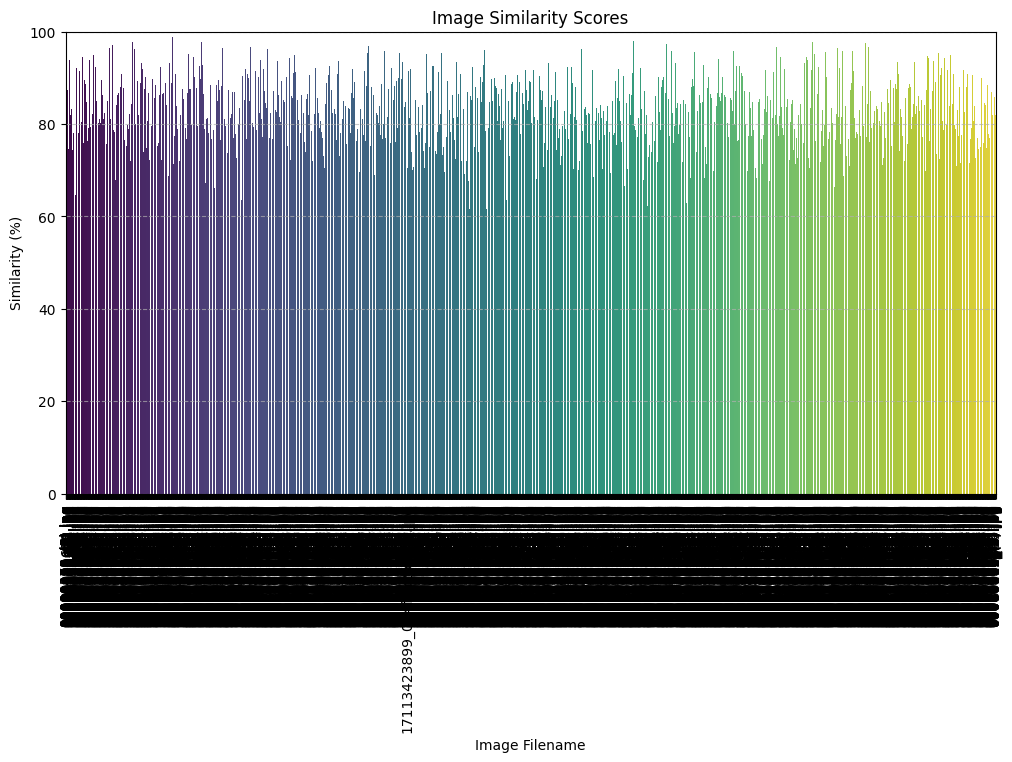

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_results(csv_file):
    """Visualizes image similarity results using a bar chart."""
    df = pd.read_csv(csv_file)

    plt.figure(figsize=(12, 6))
    sns.barplot(x='Filename', y='Similarity (%)', data=df, palette='viridis')
    plt.xticks(rotation=90)
    plt.xlabel("Image Filename")
    plt.ylabel("Similarity (%)")
    plt.title("Image Similarity Scores")
    plt.ylim(0, 100)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.show()

# Example usage:
visualize_results("output.csv")

Boxplot visualization

<ipython-input-9-3452b2d95a1a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df["Similarity (%)"], palette='coolwarm')


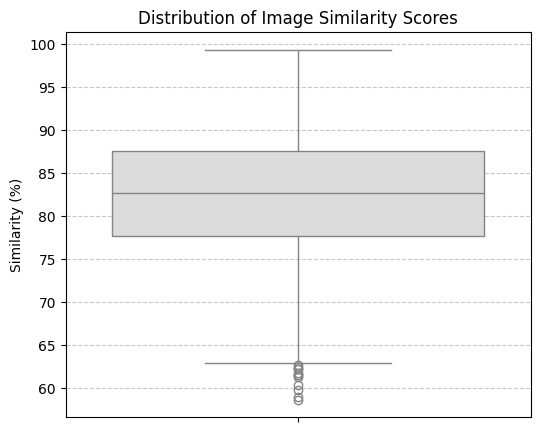

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_boxplot(csv_file):
    """Generates a box plot for similarity scores."""
    df = pd.read_csv(csv_file)

    plt.figure(figsize=(6, 5))
    sns.boxplot(y=df["Similarity (%)"], palette='coolwarm')
    plt.ylabel("Similarity (%)")
    plt.title("Distribution of Image Similarity Scores")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Example usage:
plot_boxplot("output.csv")


Statistics

In [ ]:
import pandas as pd

def calculate_statistics(csv_file):
    """Calculates and prints statistical measures from similarity scores."""
    df = pd.read_csv(csv_file)

    avg_similarity = df["Similarity (%)"].mean()
    median_similarity = df["Similarity (%)"].median()
    max_similarity = df["Similarity (%)"].max()
    min_similarity = df["Similarity (%)"].min()

    print(f"Average Similarity: {avg_similarity:.2f}%")
    print(f"Median Similarity: {median_similarity:.2f}%")
    print(f"Max Similarity: {max_similarity:.2f}%")
    print(f"Min Similarity: {min_similarity:.2f}%")

    return {
        "Average": avg_similarity,
        "Median": median_similarity,
        "Max": max_similarity,
        "Min": min_similarity
    }

# Example usage:
stats = calculate_statistics("output.csv")

Average Similarity: 82.58%
Median Similarity: 82.72%
Max Similarity: 99.36%
Min Similarity: 58.69%


Resizing script to set the images to a uniform size

In [ ]:
import os
import cv2
from tqdm import tqdm

# Input and output folders
input_folder = "images_output"
output_folder = "resized_images"
os.makedirs(output_folder, exist_ok=True)

# Find the largest width and height
max_width, max_height = 512, 512

image_files = [f for f in os.listdir(input_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# for filename in tqdm(image_files, desc="Scanning images for max size"):
#    img = cv2.imread(img_path)
#     if img is not None:
#         h, w = img.shape[:2]
#         max_width = max(max_width, w)
#         max_height = max(max_height, h)

print(f"Resizing all images to: {max_width}x{max_height}")

# Resize all images to the largest dimensions
for filename in tqdm(image_files, desc="Resizing images"):
    img_path = os.path.join(input_folder, filename)
    img = cv2.imread(img_path)
    if img is not None:
        resized_img = cv2.resize(img, (max_width, max_height), interpolation=cv2.INTER_AREA)
        cv2.imwrite(os.path.join(output_folder, filename), resized_img)

print(f"Resized images saved in {output_folder}")

Basic Image Sharpening script

In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm

# Define Sharpening Kernel
sharpen_kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]], dtype=np.float32)

# Input and Output Directories
input_dir = "corrected_images"
output_dir = "sharpened_images"
os.makedirs(output_dir, exist_ok=True)

# Process Images
for filename in tqdm(os.listdir(input_dir), desc="Sharpening Images"):
    input_path = os.path.join(input_dir, filename)
    output_path = os.path.join(output_dir, filename)

    img = cv2.imread(input_path)
    if img is None:
        print(f"Skipping {filename}, unable to load.")
        continue

    # Apply Sharpening Filter
    sharpened_img = cv2.filter2D(img, -1, sharpen_kernel)

    # Save Output
    cv2.imwrite(output_path, sharpened_img)

print(f"Sharpened images saved in {output_dir}")


Compare images script = compares the images in two folder using SSIM to get a percentage on how similar aree the two images

In [ ]:
import os
import cv2
import torch
import numpy as np
import pandas as pd
from skimage.metrics import structural_similarity as ssim

def load_image_gpu(image_path):
    """Loads an image as a grayscale tensor on GPU."""
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = torch.tensor(img, dtype=torch.float32, device='cuda') / 255.0
    return img

def compare_images(img1, img2):
    """Computes SSIM similarity score using GPU-accelerated tensors."""
    img1_np = img1.cpu().numpy()
    img2_np = img2.cpu().numpy()
    score = ssim(img1_np, img2_np, data_range=1.0)
    return score

def compare_folders(folder1, folder2, output_csv):
    """Compares images with the same filename across two folders and outputs a CSV of similarity scores."""
    files1 = set(os.listdir(folder1))
    files2 = set(os.listdir(folder2))
    common_files = files1.intersection(files2)

    results = []

    for filename in common_files:
        img1_path = os.path.join(folder1, filename)
        img2_path = os.path.join(folder2, filename)

        try:
            img1 = load_image_gpu(img1_path)
            img2 = load_image_gpu(img2_path)

            if img1.shape != img2.shape:
                print(f"Skipping {filename} due to shape mismatch.")
                continue

            similarity = compare_images(img1, img2) * 100  # Convert to percentage
            results.append([filename, similarity])
        except Exception as e:
            print(f"Error processing {filename}: {e}")

    df = pd.DataFrame(results, columns=["Filename", "Similarity (%)"])
    df.to_csv(output_csv, index=False)
    print(f"Similarity results saved to {output_csv}")


compare_folders("landscape-pictures", "sharpened_images", "output.csv")


Latest Version of CNN (Version 11)= supposed to train on aberrated images and correct the images and outputs a new folder with the fixed images

In [ ]:
import os
import cv2
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from torchvision.utils import save_image

# Load images from a folder
class ImageDataset(Dataset):
    def __init__(self, folder, img_size=(512, 512)):
        self.image_paths = [os.path.join(folder, f) for f in os.listdir(folder)]
        self.transform = transforms.Compose([
            transforms.ToPILImage(),
            transforms.Resize(img_size),
            transforms.ToTensor()
        ])

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img = cv2.imread(self.image_paths[idx], cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = self.transform(img)
        noisy_img = img + 0.2 * torch.randn_like(img)
        noisy_img = torch.clamp(noisy_img, 0.0, 1.0)
        return noisy_img, img

# Define the autoencoder model
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        self.decoder = nn.Sequential(
            nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Upsample(scale_factor=2),
            nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Upsample(scale_factor=2),
            nn.Conv2d(32, 3, kernel_size=3, stride=1, padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Train and restore images
def train_and_restore(image_folder, output_folder, img_size=(512, 512), epochs=10, batch_size=16):
    dataset = ImageDataset(image_folder, img_size)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = Autoencoder().to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Training loop
    model.train()
    for epoch in range(epochs):
        for noisy_imgs, clean_imgs in dataloader:
            noisy_imgs, clean_imgs = noisy_imgs.to(device), clean_imgs.to(device)
            optimizer.zero_grad()
            outputs = model(noisy_imgs)
            loss = criterion(outputs, clean_imgs)
            loss.backward()
            optimizer.step()
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

    # Restore images
    model.eval()
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    with torch.no_grad():
        for i, (noisy_img, _) in enumerate(dataset):
            noisy_img = noisy_img.unsqueeze(0).to(device)
            restored_img = model(noisy_img).squeeze(0).cpu()
            save_image(restored_img, os.path.join(output_folder, f"restored_{i}.png"))

    print(f"Restored images saved in {output_folder}")

# Usage
train_and_restore("resized_images", "corrected_images")

Previous Version of the CNN (Version 10)


In [ ]:
import os
import numpy as np
import cv2
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
from tqdm import tqdm

# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Define Custom Dataset
class ImageDataset(data.Dataset):
    def __init__(self, folder, img_size=(900, 900)):
        self.folder = folder
        self.img_size = img_size
        self.filenames = [f for f in os.listdir(folder) if f.endswith(('.png', '.jpg', '.jpeg'))]
        self.original_sizes = {f: cv2.imread(os.path.join(folder, f)).shape[:2] for f in self.filenames}

    def __len__(self):
        return len(self.filenames)

    def __getitem__(self, idx):
        filename = self.filenames[idx]
        img_path = os.path.join(self.folder, filename)
        img = cv2.imread(img_path)

        if img is None:
            raise ValueError(f"Failed to load image {img_path}")

        original_size = self.original_sizes[filename]
        img_resized = cv2.resize(img, self.img_size, interpolation=cv2.INTER_AREA)
        img_normalized = img_resized.astype(np.float32) / 255.0  # Normalize to [0,1]
        img_tensor = torch.tensor(img_normalized.transpose(2, 0, 1))  # Convert to CxHxW
        return img_tensor, filename, original_size

# Define CNN Model
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Conv2d(128, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Upsample(scale_factor=2),
            nn.Conv2d(64, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Upsample(scale_factor=2),
            nn.Conv2d(32, 3, kernel_size=3, padding=1),
            nn.Sigmoid()  # Normalize output to [0,1]
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Load Data
train_dir = "landscape-pictures"
output_dir = "images_output"
save_dir = "corrected_images"
os.makedirs(save_dir, exist_ok=True)

# Create Dataset and DataLoader
dataset = ImageDataset(train_dir)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = data.random_split(dataset, [train_size, test_size])

train_loader = data.DataLoader(train_dataset, batch_size=27, shuffle=True, pin_memory=True)
test_loader = data.DataLoader(test_dataset, batch_size=27, pin_memory=True)

# Initialize Model, Loss, Optimizer
model = CNNModel().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train Model
epochs = 1
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for inputs, _, _ in tqdm(train_loader, desc=f"Training Epoch {epoch+1}/{epochs}"):
        inputs = inputs.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_loader):.6f}")

# Save Model
torch.save(model.state_dict(), "cnn_image_correction.pth")

# Process New Images
output_dataset = ImageDataset(output_dir)
output_loader = data.DataLoader(output_dataset, batch_size=24, pin_memory=True)  # Small batch size for memory efficiency

model.eval()
with torch.no_grad():
    for batch_images, filenames, original_sizes in tqdm(output_loader, desc="Processing Images"):
        batch_images = batch_images.to(device)
        predicted_images = model(batch_images).cpu().numpy()

        for i, filename in enumerate(filenames):
            restored_img = (predicted_images[i].transpose(1, 2, 0) * 255).astype(np.uint8)
            original_size = original_sizes[i]
            restored_img = cv2.resize(restored_img, (original_size[1], original_size[0]))
            cv2.imwrite(os.path.join(save_dir, filename), restored_img)

print(f"Corrected images saved in {save_dir}")